In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
df= pd.read_csv(r"D:\data\test.csv")
df= pd.read_csv(r"D:\data\train.csv")
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1.0
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0.0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1.0
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0.0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1.0


In [28]:
df.shape

(265427, 24)

In [6]:
print(df.isnull().sum())

id                          0
age                         0
height(cm)                  0
weight(kg)                  0
waist(cm)                   0
eyesight(left)              0
eyesight(right)             0
hearing(left)               0
hearing(right)              0
systolic                    0
relaxation                  0
fasting blood sugar         0
Cholesterol                 0
triglyceride                0
HDL                         0
LDL                         0
hemoglobin                  0
Urine protein               0
serum creatinine            0
AST                         0
ALT                         0
Gtp                         0
dental caries               0
smoking                106171
dtype: int64


In [ ]:
# eda

<Axes: >

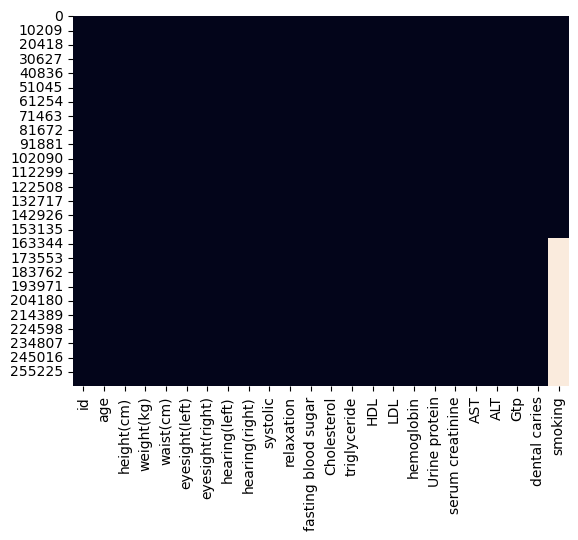

In [15]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)


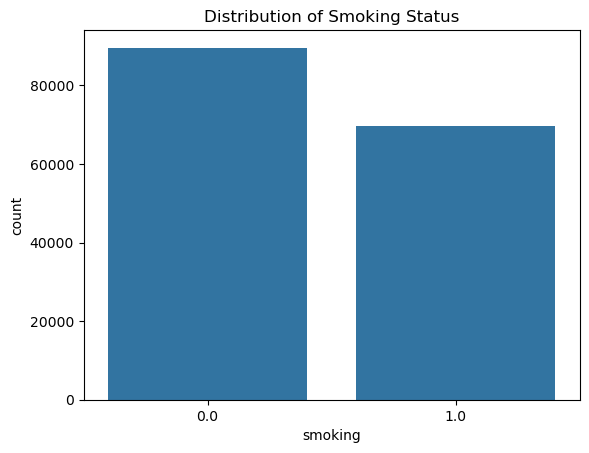

smoking
0.0    0.562635
1.0    0.437365
Name: proportion, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='smoking', data=df)
plt.title("Distribution of Smoking Status")
plt.show()

df['smoking'].value_counts(normalize=True)


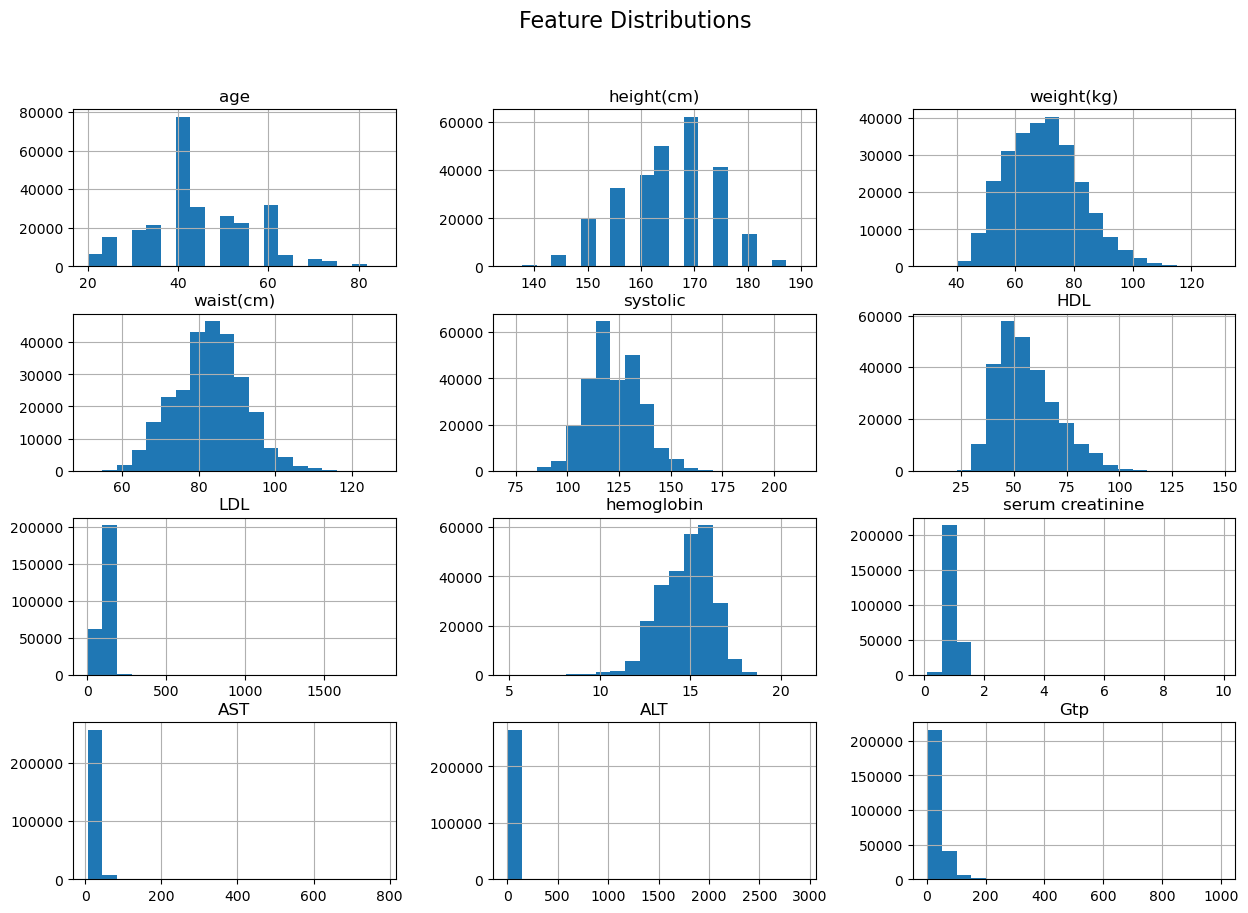

In [8]:
num_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 
             'systolic', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']

df[num_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


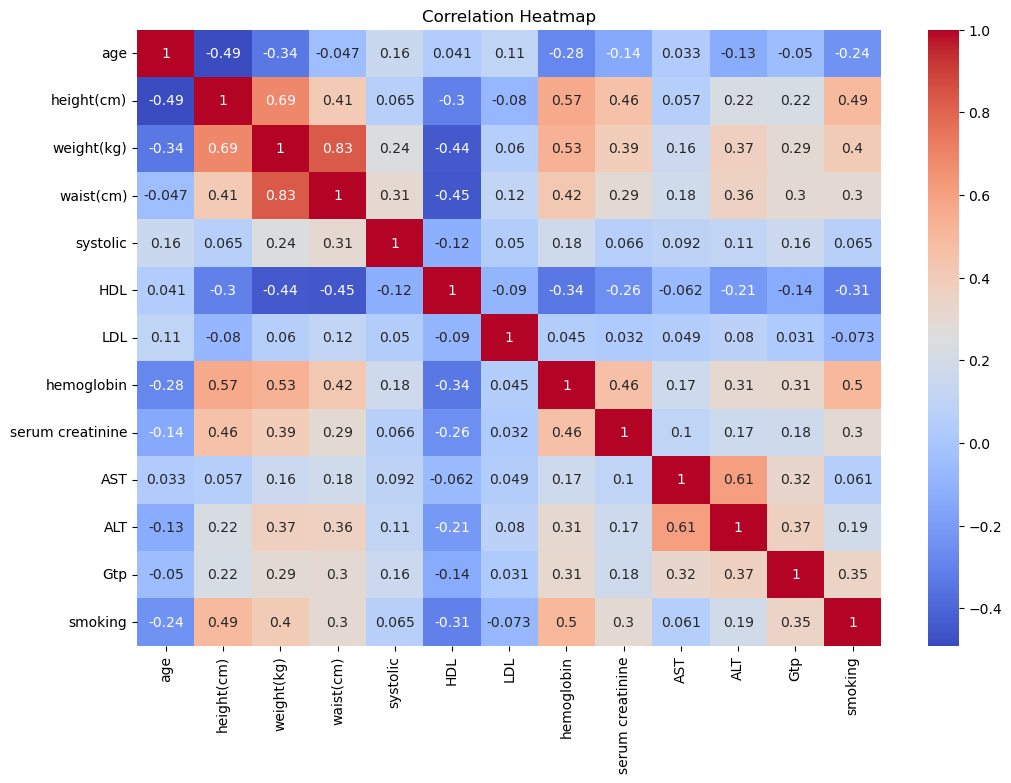

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols + ['smoking']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


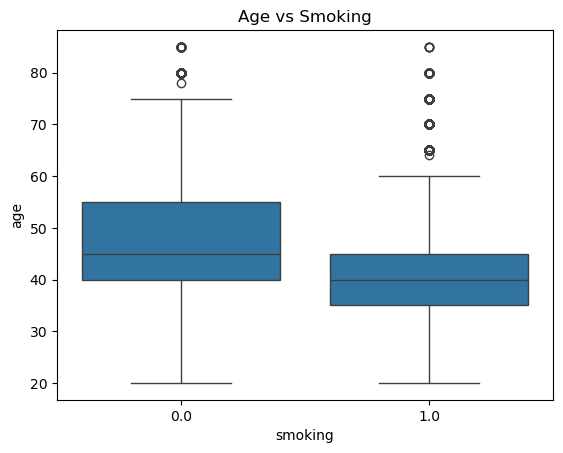

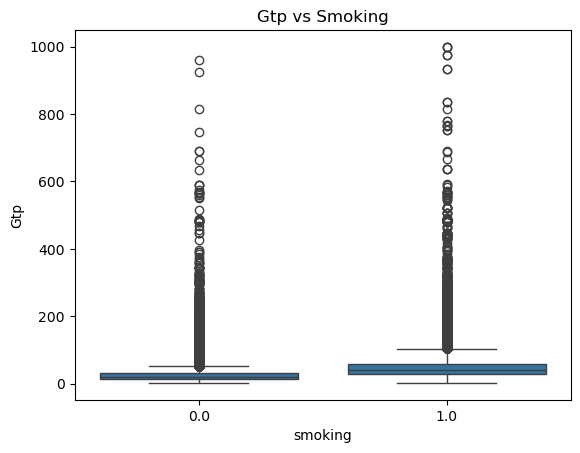

In [43]:
sns.boxplot(x='smoking', y='age', data=df)
plt.title("Age vs Smoking")
plt.show()

sns.boxplot(x='smoking', y='Gtp', data=df)
plt.title("Gtp vs Smoking")
plt.show()


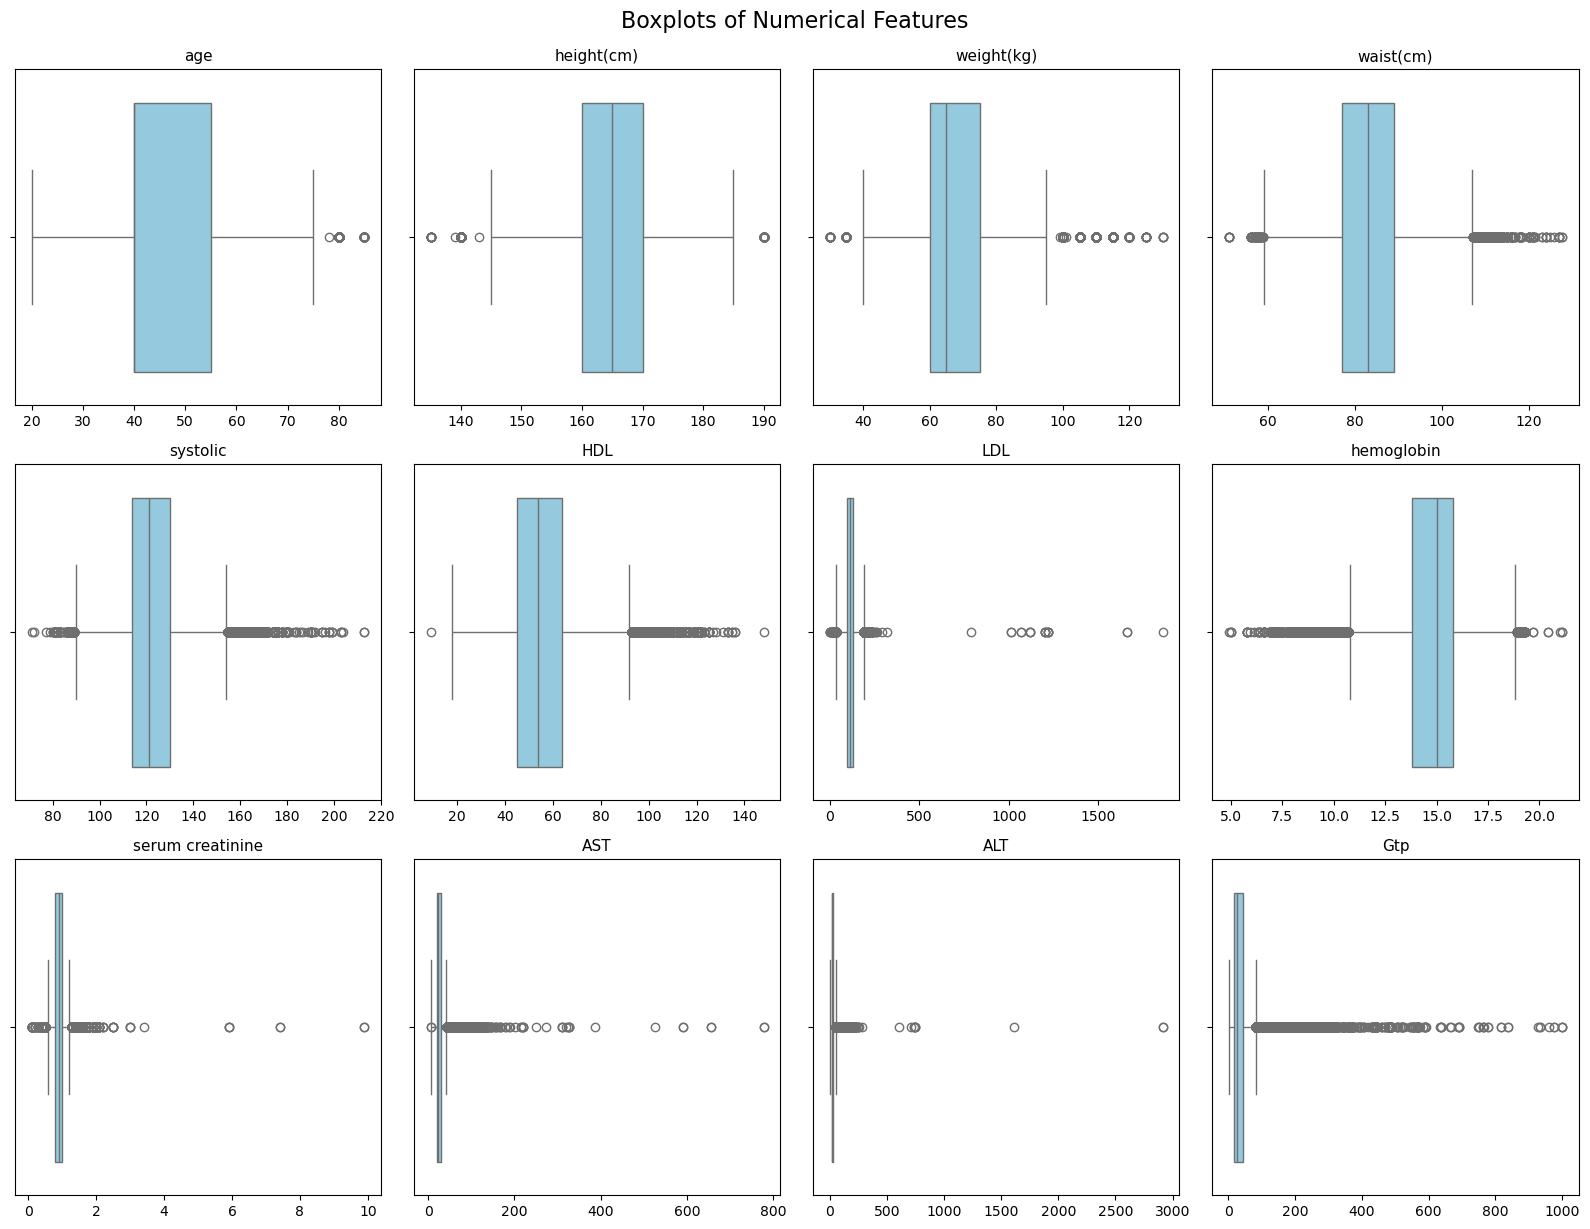

In [9]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col, fontsize=11)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features", fontsize=16, y=1.02)
plt.show()

sns.pairplot(df, vars=['age','waist(cm)','HDL','LDL','Gtp'], hue='smoking')
plt.show()


# filling null values by random forest classifier

In [25]:
train_part = df[df['smoking'].notnull()]
missing_part = df[df['smoking'].isnull()]

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_part.drop('smoking', axis=1), train_part['smoking'])

df.loc[df['smoking'].isnull(), 'smoking'] = model.predict(missing_part.drop('smoking', axis=1))


In [ ]:
train_test_split

In [35]:
X = df.drop(['id', 'smoking'], axis=1)
y = df['smoking']


In [32]:
X

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,300,40,75,16.5,1,1.0,22,25,27,0
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,55,57,126,16.2,1,1.1,27,23,37,1
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,197,45,93,17.4,1,0.8,27,31,53,0
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,203,38,102,15.9,1,1.0,20,27,30,1
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,87,44,93,15.4,1,0.8,19,13,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265422,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
265423,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
265424,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
265425,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np


models = {
    'Logistic Regression': LogisticRegression(n_jobs=2,penalty ='l2'),
    'Random Forest': RandomForestClassifier(n_estimators=15,max_depth=10,min_samples_split=3,random_state=44,oob_score= True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


for name, model in models.items():

    pipeline = make_pipeline(MinMaxScaler(), model)

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    pipeline.fit(X_train, y_train)

    y_pred_test = pipeline.predict(X_test)
    
    
    y_pred_train = pipeline.predict(X_train)

    print(f"\n🔹 {name} Results:")
    print("Cross-Validation Mean Accuracy:", round(cv_scores.mean(), 3))
    print("Cross-Validation Std Dev:", round(cv_scores.std(), 3))
    print("Test Accuracy:", round(accuracy_score(y_test, y_pred_test), 3))
    print("Train Accuracy:", round(accuracy_score(y_train, y_pred_train), 3))  # Fixed: using y_pred_train instead of y_pred

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))


🔹 Logistic Regression Results:
Cross-Validation Mean Accuracy: 0.797
Cross-Validation Std Dev: 0.002
Test Accuracy: 0.795
Train Accuracy: 0.797
Confusion Matrix:
 [[23006  6132]
 [ 4741 19207]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81     29138
         1.0       0.76      0.80      0.78     23948

    accuracy                           0.80     53086
   macro avg       0.79      0.80      0.79     53086
weighted avg       0.80      0.80      0.80     53086



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probab


🔹 Random Forest Results:
Cross-Validation Mean Accuracy: 0.823
Cross-Validation Std Dev: 0.002
Test Accuracy: 0.824
Train Accuracy: 0.837
Confusion Matrix:
 [[22991  6147]
 [ 3179 20769]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83     29138
         1.0       0.77      0.87      0.82     23948

    accuracy                           0.82     53086
   macro avg       0.83      0.83      0.82     53086
weighted avg       0.83      0.82      0.82     53086



C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:56:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:56:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:56:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:57:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr


🔹 XGBoost Results:
Cross-Validation Mean Accuracy: 0.838
Cross-Validation Std Dev: 0.001
Test Accuracy: 0.838
Train Accuracy: 0.858
Confusion Matrix:
 [[23774  5364]
 [ 3243 20705]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85     29138
         1.0       0.79      0.86      0.83     23948

    accuracy                           0.84     53086
   macro avg       0.84      0.84      0.84     53086
weighted avg       0.84      0.84      0.84     53086



In [ ]:
bag_model.fit(X_train, y_train)

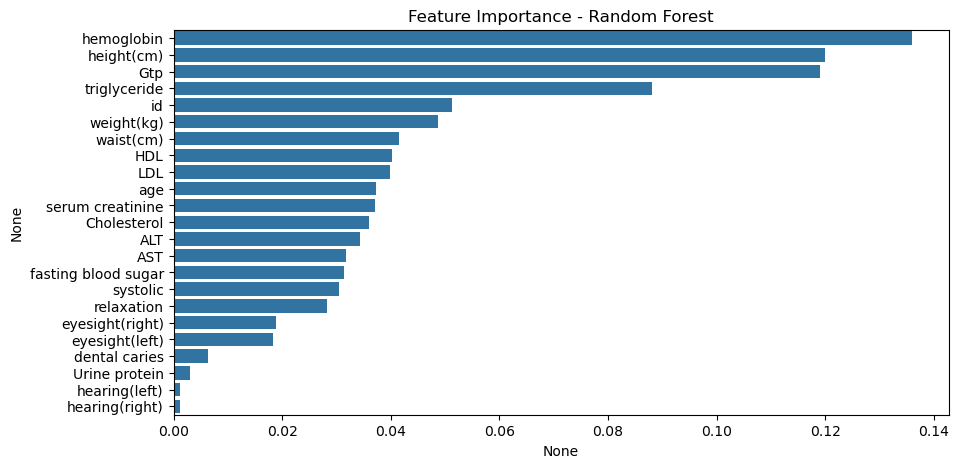

In [52]:
rf_model = models['Random Forest']
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()


# correlation

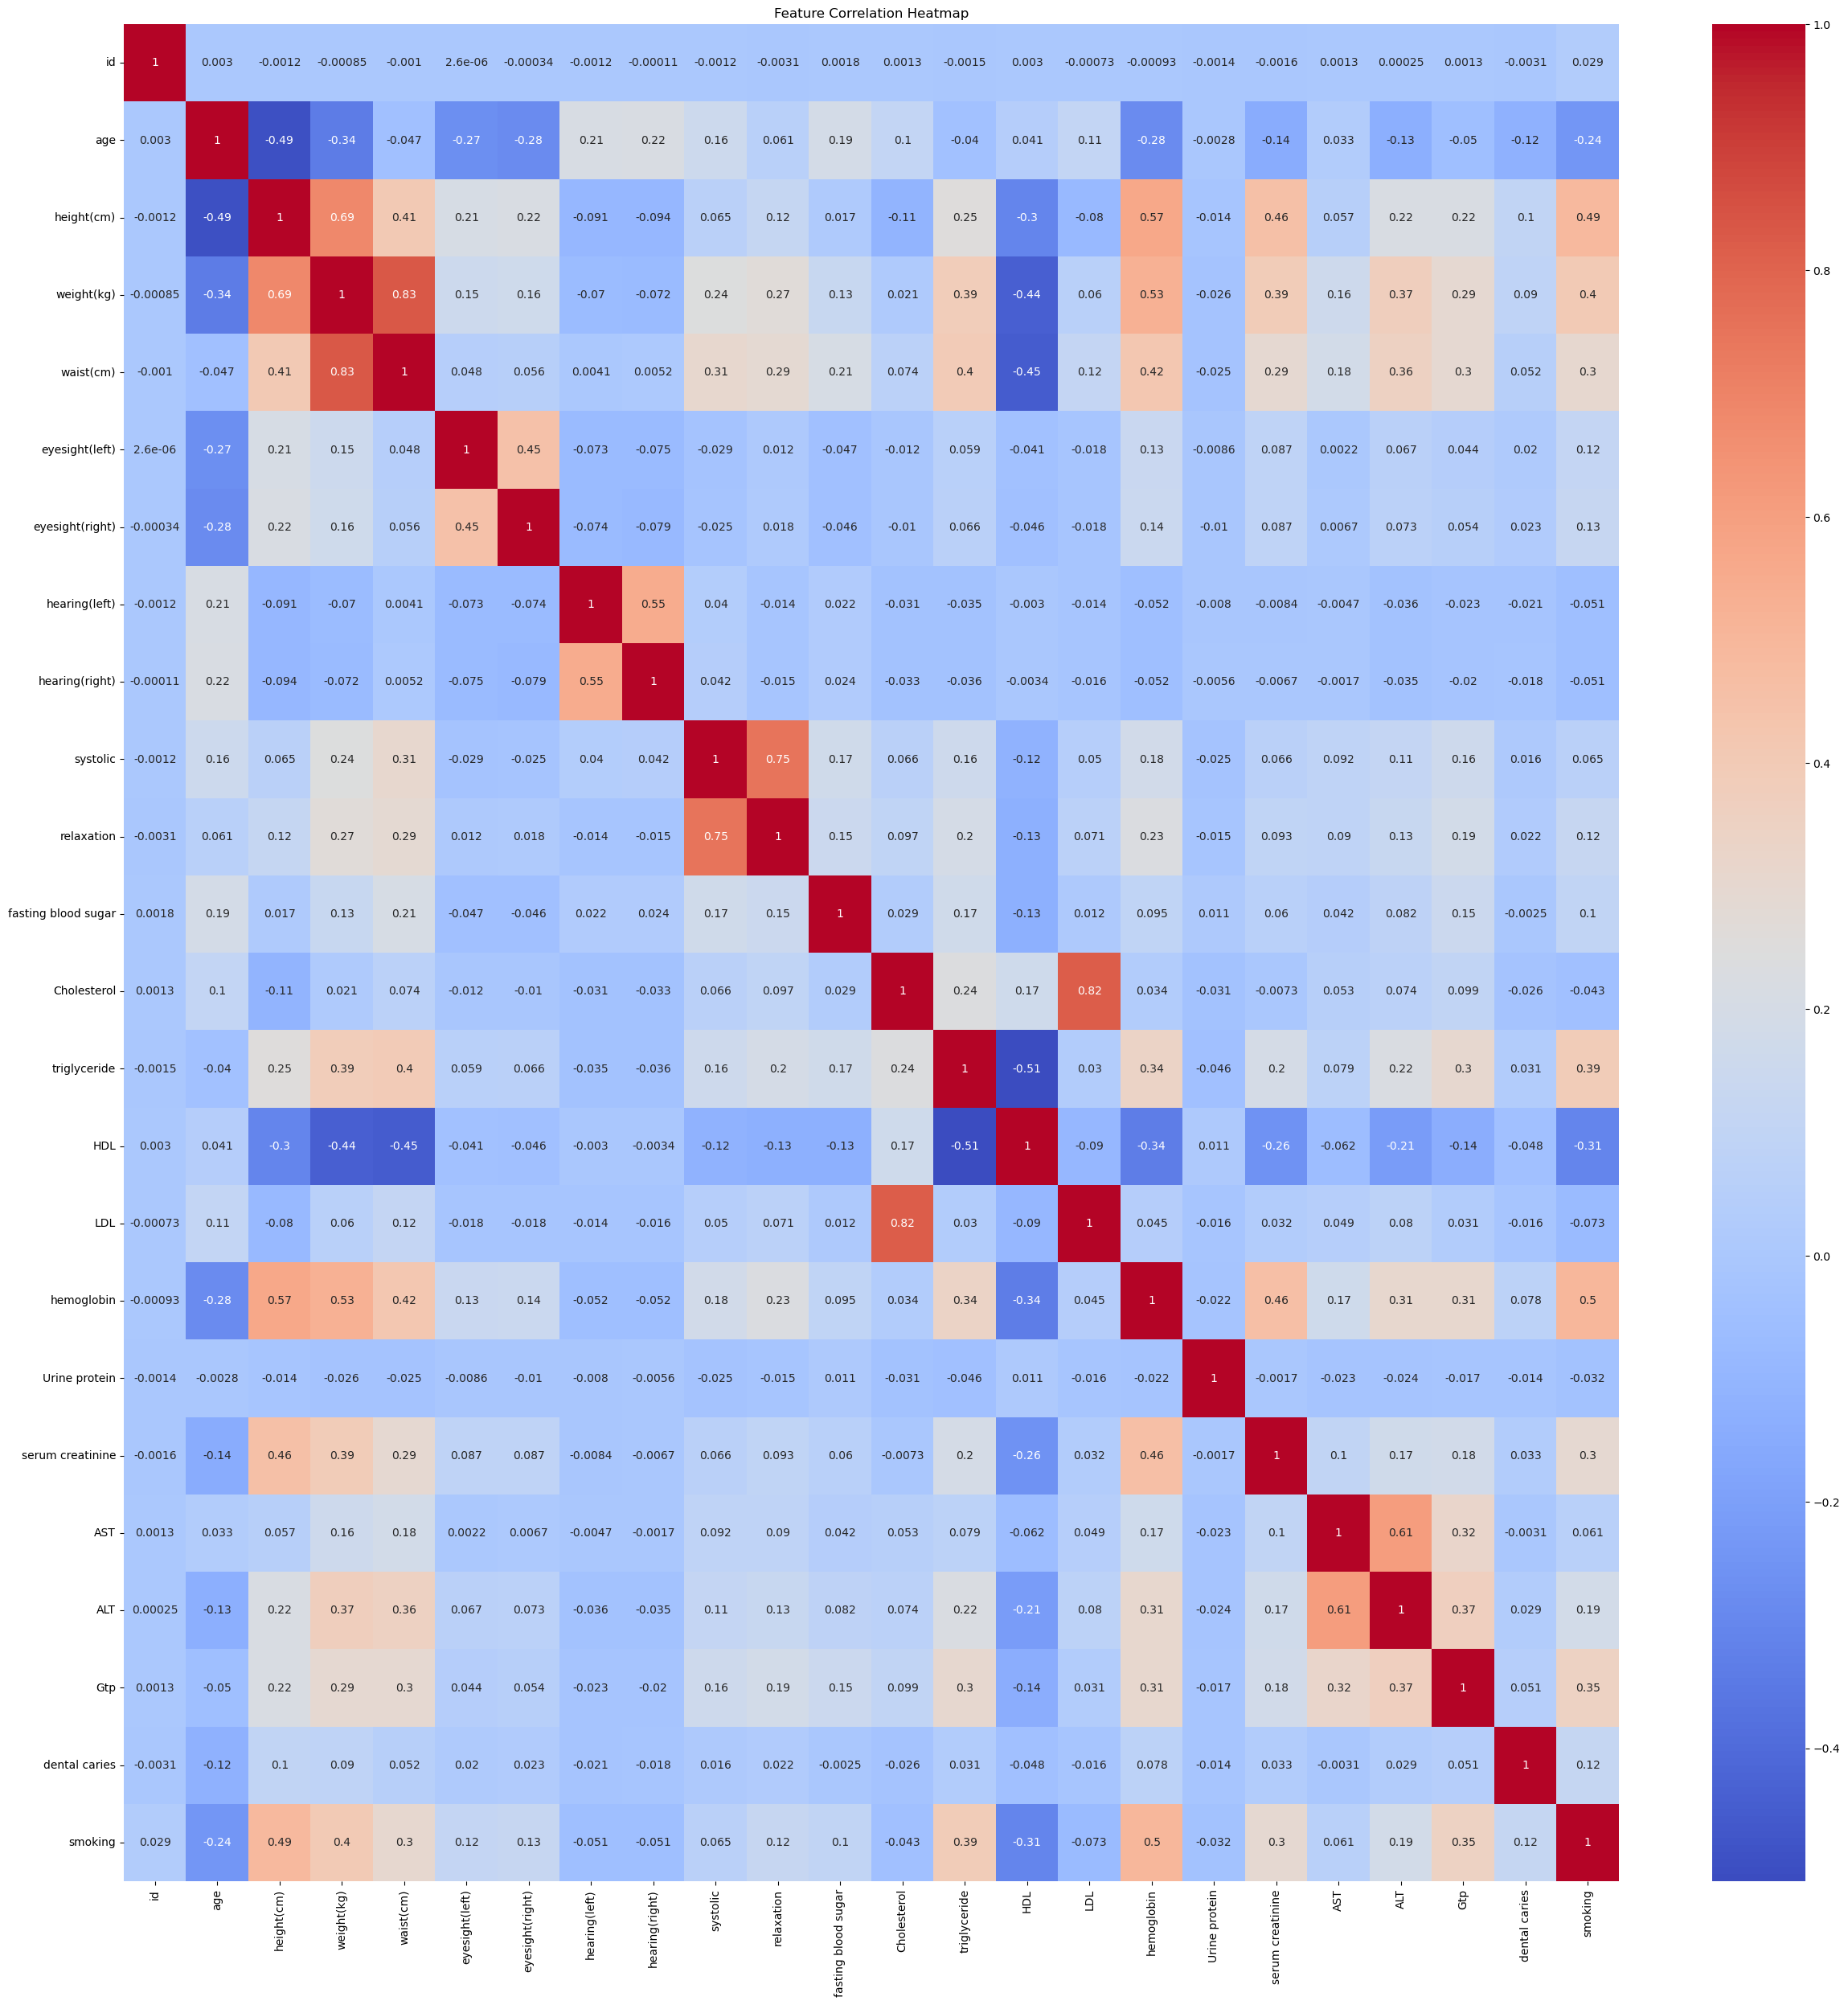

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Step 11: Interpret Model Using SHAP

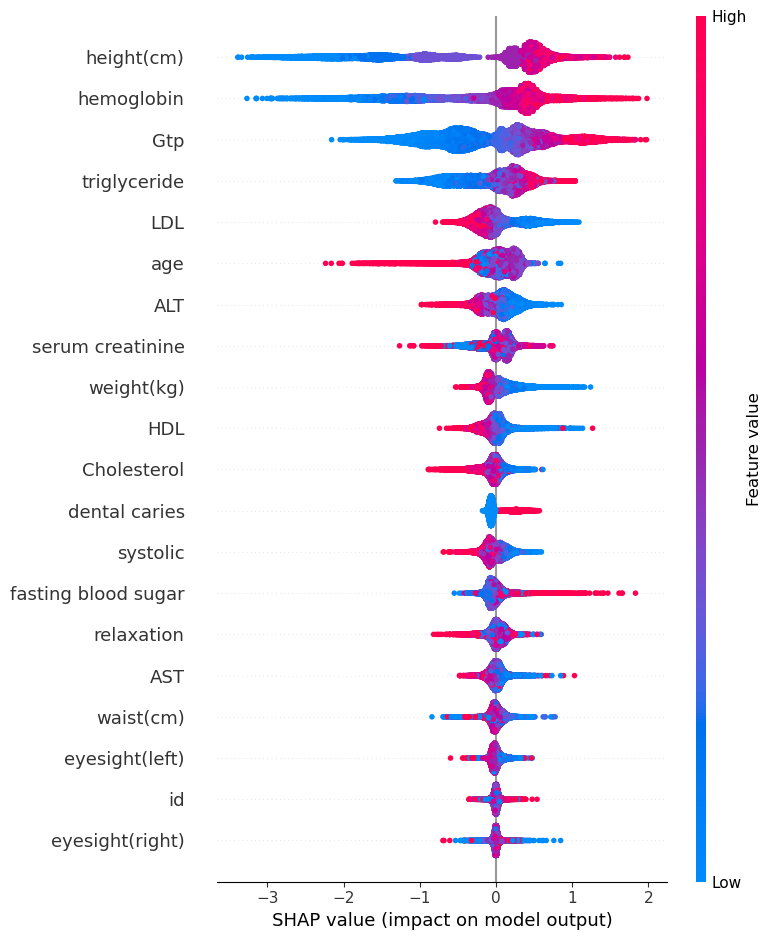

In [37]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
